# PyPortfolioOpt 0.2.0

PyPortfolioOpt es una biblioteca que implementa técnicas clásicas de optimización de carteras ampliamente utilizadas, con una serie de características experimentales. Es extenso pero fácilmente extensible, y puede ser útil tanto para el inversionista informal como para el profesional serio.

Ya sea que sea un inversor orientado a los fundamentos que haya identificado un puñado de opciones subvaloradas, o un operador algorítmico que tenga una cesta de señales interesantes, PyPortfolioOpt puede ayudarlo a combinar sus generadores alfa de una manera eficiente en cuanto a riesgos.

Diríjase a la documentación en ReadTheDocs para obtener una visión detallada del proyecto, o continúe a continuación para ver algunos ejemplos.
https://pyportfolioopt.readthedocs.io/en/latest/

Guia de uso:
https://pyportfolioopt.readthedocs.io/en/latest/UserGuide.html#user-guide

In [1]:
import pandas as pd
import numpy as np
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.hierarchical_risk_parity import hrp_portfolio
from pypfopt.value_at_risk import CVAROpt
from pypfopt import discrete_allocation

In [2]:
dicc_part = {"Acatis":98.177 , "Avantage":1411.7006, "EPSV":4496.57615,
             "TrueValue":3328.55186,"NexusPP":7260.63266,"DedaloPP":4885.72684,
             "ValorRelativo":733.272664, "Iberdrola":10257.0, "Telefonica":1862.0, 
             "Renta_4": 476.0}
# lista de ficheros
lista_ficheros = ["./Ficheros/Acatis_DE000A0X7541_r4.xlsx",
                 "./Ficheros/Avantage_ES0112231008_r4.xlsx","./Ficheros/EPSV_EP2_r4.xlsx",
                  "./Ficheros/TrueValue_ES0180792006_r4.xlsx",
                 "./Ficheros/NexusPP_F1605_r4.xlsx", "./Ficheros/DedaloPP_EP2_r4.xlsx",
                  "./Ficheros/ValorRelativo_ES0128522002_r4.xlsx", "./Ficheros/iberdrola.xlsx", 
                 "./Ficheros/telefonica.xlsx",
                  "./Ficheros/renta_4.xlsx", "./Ficheros/ibex_35.xlsx",
                  "./Ficheros/nasdaq.xlsx", "./Ficheros/nikkei_225.xlsx", "./Ficheros/sp_500.xlsx"]
                
lista_nombres = ["Acatis" , "Avantage", "EPSV","TrueValue", "NexusPP", "DedaloPP","ValorRelativo",
                "Iberdrola", "Telefonica", "Renta_4", "Ibex_35", "Nasdaq", "Nikkei_225", "SP_500"] 

# Lista de etiquetas
lista_etiquetas = ["Acatis" , "Avantage", "EPSV" , "TrueValue", "NexusPP", "DedaloPP", 
                   "ValorRelativo", "Iberdrola", "Telefonica", "Renta_4", "Ibex_35", "Nasdaq", "Nikkei_225", 
                   "SP_500"]

In [3]:
# Función para las importaciones desde Excel
#dfs1 = []

def importar_yahoo():
    start = "2000-1-4"   
    #end = date.today()
    end = dt.datetime.now()
    lista_nombres = [ 'Iberdrola', 'Telefonica', 'Renta_4', 'Ibex_35', "Eurostoxx_50", 'SP_500',
                     "Dow_Jons", 'Nasdaq', 'Nikkei_225',  "Endesa"]

    lista_tickers = ["IBE.MC", "TEF.MC", "R4.MC","^IBEX", "^STOXX50E", "^GSPC",
                     "^DJI", "^IXIC", "^N225", "ELE.MC"]

    # Obtener cotizaciones de cada ticker en un único df, ordenado por ticker y por fechas 
    # Seleccionamos un período más corto para el análisis
    def get(tickers,start,end):
        def data(ticker):
            return pd_data.DataReader(ticker,'yahoo',start,end)

        datas = map(data,tickers)

        return pd.concat(datas, keys=tickers, names=['Ticker','Date'])

    all_data = get(lista_tickers,start,end)
    all_data[:2]  
    # Reset  index
    precio_cierre  = all_data[['Close']].reset_index()
    # Reset  index
    precio_cierre  = all_data[['Close']].reset_index()
    # Pasamos la fecha a la primera columna
    cotiz_yahoo = precio_cierre.pivot('Date', 'Ticker', 'Close')
    cotiz_yahoo = cotiz_yahoo.rename(columns={"IBE.MC":"Iberdrola", "TEF.MC":'Telefonica', "R4.MC":'Renta_4',
                                "^IBEX":'Ibex_35', "^STOXX50E":"Eurostoxx_50",
                                "^GSPC":'SP_500', "^DJI":"Dow_Jons", "^IXIC":'Nasdaq',
                                "^N225":'Nikkei_225', "ELE.MC":"Endesa"})
    cotiz_yahoo = cotiz_yahoo.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

    return cotiz_yahoo

def seleccionar_grupo_valores(lista_nombres):
    # Grupos de tickers
    # Todos los fondos
    tickers0 = ["Acatis", "Avantage", "TrueValue", "ValorRelativo"]

    # Planes de Pensión
    tickers1 = ["EPSV","NexusPP", "DedaloPP"] 

    # Acciones de bolsa
    tickers2 = ["Iberdrola","Telefonica", "Renta_4" ]

    # Fondos y Planes de Pensión
    tickers3 = ["Acatis", "Avantage", "TrueValue", "ValorRelativo", "EPSV","NexusPP", "DedaloPP"]
    
    # Fondos Mixtos moderados
    tickers4 = ["Acatis", "ValorRelativo"] 

    # Fondos de Renta Variable
    tickers5 = [ "Avantage", "TrueValue" ] 

    # Toda la cartera  
    tickers6 = [ 'Iberdrola', 'Telefonica', 'Renta_4', 'Ibex_35', "Eurostoxx_50", 'SP_500',
                     "Dow_Jons", 'Nasdaq', 'Nikkei_225',  "Endesa"]
    
    # Toda la cartera e índices de bolsas
    tickers7 = ["Acatis" ,"Alhaja", "Avantage", "EPSV" ,"GFund" ,
                 "Nexus", "Pegasus","TrueValue", "NexusPP", "DedaloPP", "Polar", "ValorRelativo",
                "Iberdrola", "Telefonica", "Renta_4", "Ibex_35", "Nasdaq", "Nikkei_225", "SP_500"]

    grupos = ["Todos los fondos", "Planes de Pensión", "Acciones de bolsa", "Fondos y Planes de Pensión",
                     "Fondos mixtos moderados", "Fondos de renta variable", "Toda la cartera", 
              "Toda la cartera e índices de bolsas"]

    grupos_tickers =[tickers0, tickers1, tickers2, tickers3, tickers4, tickers5, tickers6, tickers7]

    for counter, value in enumerate(grupos):
        print(counter, value)      

    print ("\t8 - Salir")

    # solicitamos una opción al usuario
    opcion_grupo = int (input("Seleccione una opción  ") )      

    grupo_selec =  grupos_tickers[opcion_grupo]    
    valores_selec = lista_nombres[opcion_grupo]
    
    print ("\nGrupo de tickers \n", grupo_selec )
    print ("Valores seleccionados \n", valores_selec )
    
    if opcion_grupo == 8:
        raise SystemExit
        
    if opcion_grupo > 8 :
        input("No has pulsado ninguna opción correcta...\npulsa una tecla para continuar")
    
    return grupo_selec, valores_selec

# dfs1 lista de df de los ficheros importados.
def importar_excel (lista_nombres,lista_ficheros ):
    dfs1 =[]
    # Bucle para guardar en una lista (dfs1) los dataframes importados de hojas Excel
    for i in range (0, len (lista_nombres)):    
        file = lista_ficheros[i]
        nombre = lista_nombres[i]
        # Importar de un archivo Excel y llamarlo xls
        xls = pd.ExcelFile(file) # pd.ExcelFile object

        df_ret = pd.read_excel(xls, sheet_name= "Sheet1", header=None,
                                na_values='n/a')
                
        # Rellenar valores faltantes
        df_ret.ffill().bfill()
        # etiquetas de columna
                               
        df_ret.rename(columns={0:'Date', 1:nombre}, inplace = True)

        
        #df['date'] = pd.to_datetime(df['date'], format='%d/%b/%Y', utc=True)        
                
        # Estableemos como índice la columna "Fecha"
        df_ret.set_index('Date', inplace=True)
        
        dfs1.append(df_ret)
    return dfs1

def crear_df (dfs1, lista_nombres):        
    from functools import reduce
    closes = reduce(lambda left,right: pd.merge(left,right,left_index=True, right_index=True), dfs1)
    closes = closes.ffill().bfill()
    # eliminar la primera fila (da error en Acatis)
    closes.drop(closes.index[0], inplace=True)
    # Cambiar el tipo del valor de las columnas
    closes[lista_nombres] = closes[lista_nombres].apply(pd.to_numeric)
    # Resetear el índice para poder cambiar el tipo de las fechas
    closes = closes.reset_index()
    # Convertir las fechas de la columna "Date" al tipo Datetime
    closes['Date'] = pd.to_datetime(closes['Date'])
    return closes
# Esta opción de filtrado funciona si disponemos de las fechas (Date) , en una columna, no en el índice
def seleccionar_rango_fechas(closes):
    # seleccionar un rango de fecha
    mask = closes["Date"] >= "2015-01-01" 
    cols = ['Date', "Acatis" , "Avantage", "EPSV" , "TrueValue", "NexusPP", "DedaloPP", 
                   "ValorRelativo", "Iberdrola", "Telefonica", "Renta_4", "Ibex_35", "Nasdaq", "Nikkei_225", 
                   "SP_500"]
    closes = closes.loc[mask, cols]
    closes.set_index("Date", inplace = True)
    df_rango_selec = closes[grupo_selec].copy(deep=True)
    return df_rango_selec

# Importar cotizaciones e indices de Yahoo
#cotiz_yahoo = importar_yahoo()
grupo_selec, valores_selec = seleccionar_grupo_valores(lista_nombres)
dfs1 = importar_excel (lista_nombres,lista_ficheros )
closes = crear_df (dfs1, lista_nombres)
df_rango_selec = seleccionar_rango_fechas(closes)
#print ("\nGrupo de tickers \n", grupo_selec )
#print ("Valores seleccionados \n", valores_selec )
#print ("\n", closes_total[valores_selec])
#print (closes[:3])
#table = closes[grupo_selec].copy(deep=True)
df = df_rango_selec[grupo_selec] 
#table.set_index("Date", inplace = True)
print ("\n", closes[:3])    
#closes[data.isnull().any(axis = 1)]


0 Todos los fondos
1 Planes de Pensión
2 Acciones de bolsa
3 Fondos y Planes de Pensión
4 Fondos mixtos moderados
5 Fondos de renta variable
6 Toda la cartera
7 Toda la cartera e índices de bolsas
	8 - Salir
Seleccione una opción  0

Grupo de tickers 
 ['Acatis', 'Avantage', 'TrueValue', 'ValorRelativo']
Valores seleccionados 
 Acatis

         Date  Acatis  Avantage    EPSV  TrueValue  NexusPP  DedaloPP  \
0 2014-07-31  199.08      10.0  13.549      10.22   10.228    11.886   
1 2014-08-04  198.79      10.0  13.538      10.19   10.206    11.877   
2 2014-08-05  198.59      10.0  13.550      10.17   10.218    11.873   

   ValorRelativo  Iberdrola  Telefonica  Renta_4       Ibex_35       Nasdaq  \
0         11.631      5.649     12.0717     5.36  10707.200195  4369.770020   
1         11.616      5.563     11.8542     5.24  10496.200195  4383.890137   
2         11.614      5.589     11.6515     5.22  10353.799805  4352.839844   

     Nikkei_225       SP_500  
0  16563.300781  1930.67

### Procesando precios históricos

In [4]:
import pypfopt
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
df = closes.copy(deep=True)
df = df.set_index("Date")
mu = mean_historical_return(df)
S = CovarianceShrinkage(df).ledoit_wolf()
print (mu)
print (S)

Acatis           0.079404
Avantage         0.104904
EPSV             0.020802
TrueValue        0.169408
NexusPP          0.048545
DedaloPP         0.015244
ValorRelativo    0.046283
Iberdrola        0.058379
Telefonica      -0.107396
Renta_4          0.111383
Ibex_35         -0.008303
Nasdaq           0.190222
Nikkei_225       0.140063
SP_500           0.127376
dtype: float64
                 Acatis  Avantage      EPSV  TrueValue   NexusPP  DedaloPP  \
Acatis         0.007864  0.006225  0.000999   0.005717  0.004314  0.000533   
Avantage       0.006225  0.010899  0.001388   0.007522  0.005613  0.000689   
EPSV           0.000999  0.001388  0.000962   0.001095  0.001415  0.000169   
TrueValue      0.005717  0.007522  0.001095   0.011297  0.004548  0.000666   
NexusPP        0.004314  0.005613  0.001415   0.004548  0.005945  0.000522   
DedaloPP       0.000533  0.000689  0.000169   0.000666  0.000522  0.000641   
ValorRelativo  0.001534  0.002106  0.000471   0.002040  0.001536  0.000314 

Con los rendimientos esperados (mu) y un modelo de riesgo (S) para la cartera seleccionada, generarmos una cartera óptima:

### Optimización de la  Frontera Eficiente

In [5]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
weights

{'Acatis': 0.0,
 'Avantage': 0.0,
 'EPSV': 0.0,
 'TrueValue': 0.7840038934447305,
 'NexusPP': 0.0,
 'DedaloPP': 0.0,
 'ValorRelativo': 1.2645462653902427e-15,
 'Iberdrola': 0.0,
 'Telefonica': 8.546187717078984e-15,
 'Renta_4': 0.15140449961775576,
 'Ibex_35': 4.840782685875027e-15,
 'Nasdaq': 0.06459160693750915,
 'Nikkei_225': 3.30844727641441e-16,
 'SP_500': 7.159622902787842e-16}

Este es  el resultado sin procesar del optimizador. Se recomienda que utilizar el método clean_weights (), que trunca los pesos pequeños a cero y redondea el resto.

In [6]:
cleaned_weights = ef.clean_weights()
print(cleaned_weights)

{'Acatis': 0.0, 'Avantage': 0.0, 'EPSV': 0.0, 'TrueValue': 0.784, 'NexusPP': 0.0, 'DedaloPP': 0.0, 'ValorRelativo': 0.0, 'Iberdrola': 0.0, 'Telefonica': 0.0, 'Renta_4': 0.1514, 'Ibex_35': 0.0, 'Nasdaq': 0.06459, 'Nikkei_225': 0.0, 'SP_500': 0.0}


Para conocer el rendimiento esperado de la cartera con ponderaciones óptimas w, podemos usar el método ** portfolio_performance ()**:

In [7]:
ef.portfolio_performance(verbose=True)

Expected annual return: 16.2%
Annual volatility: 9.8%
Sharpe Ratio: 1.44


(0.16196710948649207, 0.09761634202700564, 1.4415023772258237)

 ### Posiciones cortas
 Para permitir el cortocircuito, simplemente inicialice el objeto EfficientFrontier con límites que permitan pesos negativos, por ejemplo:

In [8]:
ef = EfficientFrontier(mu, S, weight_bounds=(-1,1))
ef

Esto se puede extender para generar carteras neutrales en el mercado (con pesos que se suman a cero), pero solo están disponibles para los métodos de optimización efficient_risk () y efficient_return () por razones matemáticas. Si desea una cartera neutral para el mercado, pase market_neutral = True como se muestra a continuación: 

In [9]:
ef.efficient_return(target_return=0.2, market_neutral=True)

{'Acatis': 0.027742746784525475,
 'Avantage': 0.3327800381909787,
 'EPSV': -0.5135717247595681,
 'TrueValue': 0.5569942938100133,
 'NexusPP': 0.34028717074105685,
 'DedaloPP': -0.7844094771166528,
 'ValorRelativo': 0.3162055962823942,
 'Iberdrola': 0.10174895478953079,
 'Telefonica': -0.1531884759129197,
 'Renta_4': 0.0658419464538449,
 'Ibex_35': -0.2909597219509437,
 'Nasdaq': 0.3628448303539821,
 'Nikkei_225': 0.3943590300479867,
 'SP_500': -0.7566752077142287}

 ### Tratando con muchos pesos despreciables
 Por experiencia, he encontrado que la optimización eficiente de la frontera a menudo establece que muchas de las ponderaciones de los activos sean cero. Esto puede no ser ideal si necesita tener un cierto número de posiciones en su cartera, con fines de diversificación o de otro tipo.

Para combatir esto, he introducido una característica experimental, que toma prestada la idea de regularización del aprendizaje automático. Esencialmente, al agregar una función de costo adicional al objetivo, puede "alentar" al optimizador a elegir diferentes ponderaciones (los detalles matemáticos se proporcionan en la sección Regularización de L2). Para usar esta característica, cambie el parámetro gamma:

In [10]:
ef = EfficientFrontier(mu, S, gamma=1)
ef.max_sharpe()
print(ef.clean_weights())

{'Acatis': 0.0232, 'Avantage': 0.04173, 'EPSV': 0.07083, 'TrueValue': 0.32434, 'NexusPP': 0.0, 'DedaloPP': 0.0765, 'ValorRelativo': 0.16103, 'Iberdrola': 0.0, 'Telefonica': 0.0, 'Renta_4': 0.13595, 'Ibex_35': 0.0, 'Nasdaq': 0.13079, 'Nikkei_225': 0.03564, 'SP_500': 0.0}


### Mejorar el rendimiento
Digamos que ha realizado pruebas retrospectivas y los resultados no son espectaculares. ¿Qué deberías intentar?

     * Soltar los rendimientos esperados. Existe una gran cantidad de investigaciones que sugieren que las carteras de varianza mínima superan constantemente a las carteras de ratio de Sharpe máximo fuera de la muestra, debido a la dificultad de pronosticar los rendimientos esperados.
     * Pruebe diferentes modelos de riesgo: diferentes clases de activos pueden requerir diferentes modelos de riesgo.
     * Ajuste el parámetro de regularización L2 para ver cómo la diversificación afecta el rendimiento.
     Pruebe un optimizador diferente: consulte la sección Otros optimizadores para ver algunas posibilidades.

Con esto concluye la visita guiada. Diríjase a las secciones correspondientes en la barra lateral para obtener más información sobre los parámetros y los detalles teóricos de las diferentes funciones que ofrece PyPortfolioOpt.

## Retorno esperado
La optimización de varianza media requiere el conocimiento de los rendimientos esperados. En la práctica, estos son bastante difíciles de saber con certeza. Por lo tanto, lo mejor que podemos hacer es elaborar estimaciones, por ejemplo, extrapolando datos históricos. Aquí es donde radica la principal falla en la frontera eficiente: el procedimiento de optimización es sólido y proporciona garantías matemáticas sólidas, dadas las entradas correctas. Esta es una de las razones por las que he enfatizado la modularidad: los usuarios deberían poder crear sus propios modelos superiores e introducirlos en el optimizador.
Se proporcionan precios diarios, aunque en realidad las funciones son ajenas al período de tiempo (solo se cambia el parámetro de frecuencia). Los precios de los activos deben darse como un dataframe de pandas, según el formato descrito en la Guía del usuario.Todas las funciones procesan los datos de precios en porcentajes de retornos, antes de calcular sus estimaciones respectivas de retornos esperados.

In [11]:
"""Calcular el rendimiento histórico anual (promedio) anualizado de los precios 
diarios de los activos del portfolio (diarios)."""
pypfopt.expected_returns.mean_historical_return(df, frequency=252)

Acatis           0.079404
Avantage         0.104904
EPSV             0.020802
TrueValue        0.169408
NexusPP          0.048545
DedaloPP         0.015244
ValorRelativo    0.046283
Iberdrola        0.058379
Telefonica      -0.107396
Renta_4          0.111383
Ibex_35         -0.008303
Nasdaq           0.190222
Nikkei_225       0.140063
SP_500           0.127376
dtype: float64

In [12]:
"""Calcular la media ponderada exponencialmente de los rendimientos históricos (diarios), 
dando mayor peso a los datos más recientes."""
pypfopt.expected_returns.ema_historical_return(df, frequency=252, span=500)

Acatis           0.090464
Avantage         0.100376
EPSV             0.014559
TrueValue        0.114157
NexusPP          0.037736
DedaloPP         0.004932
ValorRelativo    0.023662
Iberdrola        0.030644
Telefonica      -0.167772
Renta_4          0.170439
Ibex_35         -0.019554
Nasdaq           0.247205
Nikkei_225       0.175458
SP_500           0.167610
Name: 2018-08-29 00:00:00, dtype: float64

### Modelo de riesgo
Además de los retornos esperados, la optimización de la varianza media requiere un modelo de riesgo, alguna forma de cuantificar el riesgo de los activos. El modelo de riesgo de uso más frecuente es la matriz de covarianza, una entidad estadística que describe la volatilidad de los rendimientos de los activos y cómo varían entre sí. Esto es importante porque uno de los principios de la diversificación es que el riesgo se puede reducir al hacer muchas apuestas no correlacionadas (y la correlación es simplemente una covarianza normalizada).

En muchos sentidos, el tema de los modelos de riesgo es mucho más importante que el de los rendimientos esperados porque la variación histórica es generalmente una estadística mucho más predictiva que los rendimientos históricos medios. De hecho, la investigación de Kritzman et al. (2010) [1] sugiere que las carteras de varianza mínima, que descuidan proporcionar los rendimientos esperados, en realidad se desempeñan mucho mejor fuera de la muestra.

Sin embargo, el problema es que en la práctica no tenemos acceso a la matriz de covarianza (de la misma manera que no tenemos acceso a los rendimientos esperados), lo único que podemos hacer es hacer estimaciones basadas en datos anteriores. El enfoque más directo es simplemente calcular la matriz de covarianza de la muestra en función de los retornos históricos, pero las investigaciones relativamente recientes (posteriores a 2000) indican que existen estimadores estadísticos mucho más sólidos de la matriz de covarianza. Además de proporcionar una envoltura alrededor de los estimadores en sklearn, PyPortfolioOpt proporciona algunas alternativas novedosas como la semicovarianza y la covarianza ponderada exponencialmente.

In [13]:
"""Calcule la matriz de covarianza de la muestra anualizada de los
rendimientos diarios de activos (diarios)"""
pypfopt.risk_models.sample_cov(df, frequency=252)

,Acatis,Avantage,EPSV,TrueValue,NexusPP,DedaloPP,ValorRelativo,Iberdrola,Telefonica,Renta_4,Ibex_35,Nasdaq,Nikkei_225,SP_500
Acatis,0.007579,0.006380,0.001024,0.005859,0.004421,0.000547,0.001572,0.005839,0.013562,0.001850,0.012585,0.009088,0.008002,0.008065
Avantage,0.006380,0.010689,0.001422,0.007710,0.005753,0.000706,0.002159,0.010273,0.019242,0.003909,0.018118,0.009503,0.008308,0.008528
EPSV,0.001024,0.001422,0.000505,0.001122,0.001450,0.000173,0.000483,0.001617,0.003327,0.000602,0.002968,0.001294,0.001134,0.001193
TrueValue,0.005859,0.007710,0.001122,0.011097,0.004661,0.000682,0.002091,0.007848,0.014852,0.002725,0.014445,0.012207,0.009740,0.010250
NexusPP,0.004421,0.005753,0.001450,0.004661,0.005612,0.000534,0.001575,0.006282,0.014296,0.002331,0.012682,0.006258,0.005767,0.005885
DedaloPP,0.000547,0.000706,0.000173,0.000682,0.000534,0.000176,0.000321,0.001075,0.001772,0.000369,0.001522,0.000809,0.000603,0.000664
ValorRelativo,0.001572,0.002159,0.000483,0.002091,0.001575,0.000321,0.000969,0.002759,0.004880,0.000840,0.004290,0.002324,0.001825,0.001963
Iberdrola,0.005839,0.010273,0.001617,0.007848,0.006282,0.001075,0.002759,0.034657,0.029995,0.004729,0.025125,0.008057,0.006545,0.007209
Telefonica,0.013562,0.019242,0.003327,0.014852,0.014296,0.001772,0.004880,0.029995,0.075733,0.004607,0.051881,0.018697,0.016898,0.017377
Renta_4,0.001850,0.003909,0.000602,0.002725,0.002331,0.000369,0.000840,0.004729,0.004607,0.025756,0.006052,0.002745,0.002400,0.002396


In [14]:
"""Estima la matriz de semicovarianza, es decir, la covarianza, dado que los retornos 
son menores que el índice de referencia."""
pypfopt.risk_models.semicovariance(df, benchmark=0, frequency=252)

,Acatis,Avantage,EPSV,TrueValue,NexusPP,DedaloPP,ValorRelativo,Iberdrola,Telefonica,Renta_4,Ibex_35,Nasdaq,Nikkei_225,SP_500
Acatis,0.002901,0.002614,0.000437,0.002122,0.001881,0.000234,0.000614,0.002348,0.005096,0.000966,0.005083,0.003528,0.003309,0.003270
Avantage,0.002614,0.004415,0.000630,0.002965,0.002614,0.000340,0.000875,0.004270,0.007868,0.001773,0.007790,0.004057,0.003750,0.003781
EPSV,0.000437,0.000630,0.000194,0.000460,0.000623,0.000072,0.000186,0.000658,0.001358,0.000380,0.001265,0.000641,0.000585,0.000601
TrueValue,0.002122,0.002965,0.000460,0.003885,0.002003,0.000273,0.000704,0.002784,0.005373,0.001284,0.005645,0.004993,0.004139,0.004293
NexusPP,0.001881,0.002614,0.000623,0.002003,0.002572,0.000251,0.000675,0.002611,0.005877,0.001527,0.005570,0.002895,0.002714,0.002760
DedaloPP,0.000234,0.000340,0.000072,0.000273,0.000251,0.000073,0.000122,0.000475,0.000776,0.000206,0.000708,0.000388,0.000325,0.000339
ValorRelativo,0.000614,0.000875,0.000186,0.000704,0.000675,0.000122,0.000344,0.000978,0.001673,0.000419,0.001683,0.000930,0.000836,0.000844
Iberdrola,0.002348,0.004270,0.000658,0.002784,0.002611,0.000475,0.000978,0.013156,0.011375,0.001867,0.009839,0.003505,0.003326,0.003327
Telefonica,0.005096,0.007868,0.001358,0.005373,0.005877,0.000776,0.001673,0.011375,0.031658,0.002852,0.021622,0.007817,0.007312,0.007421
Renta_4,0.000966,0.001773,0.000380,0.001284,0.001527,0.000206,0.000419,0.001867,0.002852,0.010604,0.003246,0.001867,0.001772,0.001785


In [15]:
"""Estima la matriz de covarianza ponderada exponencialmente, otorgando mayor importancia 
a los datos más recientes."""
pypfopt.risk_models.exp_cov(df, span=180, frequency=252)

,Acatis,Avantage,EPSV,TrueValue,NexusPP,DedaloPP,ValorRelativo,Iberdrola,Telefonica,Renta_4,Ibex_35,Nasdaq,Nikkei_225,SP_500
Acatis,0.004297,0.001799,0.000052,0.002192,0.000813,0.000143,0.000242,0.001873,0.003941,0.001362,0.004293,0.005500,0.005104,0.004791
Avantage,0.001799,0.004109,0.000188,0.001941,0.000814,0.000226,0.000409,0.002508,0.004386,0.002298,0.004896,0.003596,0.003372,0.003081
EPSV,0.000052,0.000188,0.000139,0.000036,0.000242,0.000054,0.000070,0.000613,0.000708,0.000171,0.000607,-0.000464,-0.000404,-0.000412
TrueValue,0.002192,0.001941,0.000036,0.004085,0.000739,0.000174,0.000289,0.001835,0.002996,0.000904,0.003929,0.004810,0.004258,0.004012
NexusPP,0.000813,0.000814,0.000242,0.000739,0.000940,0.000144,0.000209,0.001944,0.003233,0.000589,0.003191,0.000482,0.000902,0.000635
DedaloPP,0.000143,0.000226,0.000054,0.000174,0.000144,0.000075,0.000089,0.000501,0.000720,0.000163,0.000631,0.000185,0.000229,0.000190
ValorRelativo,0.000242,0.000409,0.000070,0.000289,0.000209,0.000089,0.000171,0.000714,0.001009,0.000360,0.000993,0.000460,0.000477,0.000413
Iberdrola,0.001873,0.002508,0.000613,0.001835,0.001944,0.000501,0.000714,0.025329,0.011351,0.001862,0.010301,0.001223,0.001748,0.001685
Telefonica,0.003941,0.004386,0.000708,0.002996,0.003233,0.000720,0.001009,0.011351,0.029128,0.002087,0.017198,0.003982,0.006696,0.005209
Renta_4,0.001362,0.002298,0.000171,0.000904,0.000589,0.000163,0.000360,0.001862,0.002087,0.022930,0.002745,0.001619,0.001668,0.001389


In [16]:
"""Calcula el determinante de covarianza mínimo, un estimador de la matriz de covarianza que es más robusto al ruido."""
pypfopt.risk_models.min_cov_determinant(df, frequency=252, random_state=None)

,Acatis,Avantage,EPSV,TrueValue,NexusPP,DedaloPP,ValorRelativo,Iberdrola,Telefonica,Renta_4,Ibex_35,Nasdaq,Nikkei_225,SP_500
Acatis,0.003119,0.001383,0.000144,0.001279,0.000689,0.000084,0.000185,0.001457,0.002696,-0.000263,0.002771,0.002919,0.002404,0.002407
Avantage,0.001383,0.002885,0.000172,0.001302,0.000740,0.000080,0.000194,0.001711,0.003415,0.000229,0.003579,0.001733,0.001610,0.001546
EPSV,0.000144,0.000172,0.000077,0.000076,0.000143,0.000024,0.000043,0.000244,0.000380,-0.000076,0.000327,0.000061,0.000065,0.000050
TrueValue,0.001279,0.001302,0.000076,0.002951,0.000485,0.000082,0.000133,0.000791,0.002448,-0.000342,0.002403,0.002911,0.002479,0.002437
NexusPP,0.000689,0.000740,0.000143,0.000485,0.000589,0.000048,0.000107,0.000933,0.001965,-0.000318,0.001876,0.000837,0.000807,0.000770
DedaloPP,0.000084,0.000080,0.000024,0.000082,0.000048,0.000039,0.000043,0.000144,0.000149,0.000029,0.000146,0.000101,0.000094,0.000082
ValorRelativo,0.000185,0.000194,0.000043,0.000133,0.000107,0.000043,0.000094,0.000298,0.000416,-0.000005,0.000378,0.000177,0.000210,0.000170
Iberdrola,0.001457,0.001711,0.000244,0.000791,0.000933,0.000144,0.000298,0.012449,0.007297,0.000556,0.005727,0.001208,0.001073,0.001172
Telefonica,0.002696,0.003415,0.000380,0.002448,0.001965,0.000149,0.000416,0.007297,0.019638,-0.000297,0.012170,0.003486,0.003289,0.003417
Renta_4,-0.000263,0.000229,-0.000076,-0.000342,-0.000318,0.000029,-0.000005,0.000556,-0.000297,0.011777,-0.000567,-0.000733,-0.000538,-0.000480


# Optimización Fontera eficiente 
https://pyportfolioopt.readthedocs.io/en/latest/EfficientFrontier.html

In [19]:
import pandas as pd
import numpy as np
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.hierarchical_risk_parity import hrp_portfolio
from pypfopt.value_at_risk import CVAROpt
from pypfopt import discrete_allocation

class pypfopt.efficient_frontier.EfficientFrontier(expected_returns, cov_matrix, weight_bounds=(0, 1), gamma=0):
    
    __init__(expected_returns, cov_matrix, weight_bounds=(0, 1), gamma=0)        
    

    def print_ERET(target_return, market_neutral=False):
        ERET = efficient_return(target_return, market_neutral=False)
        print (ERET)
             
    def print_ERISK(target_risk):
        ERISK = efficient_risk(target_risk, risk_free_rate=0.02, market_neutral=False)
        print (ERISK)
             
    def print_MaxSharp():
        MaxSharp = max_sharpe(risk_free_rate=0.02)
        print (MaxSharp)
             
    def print_MinVol ():
        MinVol = min_volatility()
        print (MinVol)
             
    def Potf_Perf():
        Potf_Perf = portfolio_performance(verbose=False, risk_free_rate=0.02)        
        
prueba = pypfopt.efficient_frontier.EfficientFrontier(expected_returns,cov_matrix )

prueba.print_ERET(target_return)
             
prueba.print_ERISK(target_risk)
             
prueba.print_MaxSharp()
             
prueba.print_MinVol ()            
             
prueba.Potf_Perf()            
             
             

SyntaxError: invalid syntax (<ipython-input-19-d297340607b9>, line 10)

In [29]:
import pypfopt

from pypfopt import efficient_return 
efficient_return(target_return, market_neutral=False)

ImportError: cannot import name 'efficient_return'

In [ ]:
efficient_risk(target_risk, risk_free_rate=0.02, market_neutral=False)

In [ ]:
max_sharpe(risk_free_rate=0.02)

In [30]:
import pypfopt
from pypfopt import min_volatility
min_volatility()

ImportError: cannot import name 'min_volatility'

In [ ]:
portfolio_performance(verbose=False, risk_free_rate=0.02)

# Guia de uso

Está diseñado para ser una guía práctica, principalmente dirigida a usuarios que están interesados ​​en una forma rápida de combinar de forma óptima algunos activos (probablemente, acciones). Sin embargo, cuando sea necesario, introduzco la teoría requerida y también señalo áreas que pueden ser trampolines adecuados para técnicas de optimización más avanzadas. Los detalles sobre los parámetros se pueden encontrar en las páginas de documentación respectivas (consulte la barra lateral).

Para esta guía, nos centraremos en la optimización de varianza media (MVO), que es lo que piensa la mayoría de las personas cuando escuchan la "optimización de cartera". MVO forma el núcleo de la oferta de PyPortfolioOpt, aunque se debe tener en cuenta que MVO tiene muchos sabores, que pueden tener características de rendimiento muy diferentes. Consulte la barra lateral para tener una idea de las posibilidades, así como los otros métodos de optimización ofrecidos. Pero por ahora, continuaremos con la Frontera Eficiente.

PyPortfolioOpt está diseñado teniendo en cuenta la modularidad; El siguiente diagrama de flujo resume la funcionalidad actual y el diseño general de PyPortfolioOpt.
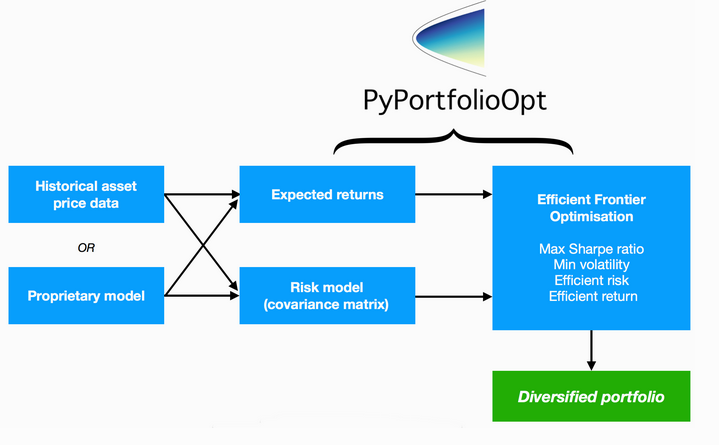


### Procesando precios históricos

La optimización eficiente de la frontera requiere dos cosas: los retornos esperados de los activos y la matriz de covarianza (o, más generalmente, un modelo de riesgo que cuantifica el riesgo de los activos). PyPortfolioOpt proporciona métodos para estimar ambos (ubicados en expected_returns y risk_models respectivamente), pero también es compatible con los usuarios que deseen usar sus propios modelos.

Sin embargo, asumo que la mayoría de los usuarios (al menos inicialmente) preferirán usar los componentes integrados. En este caso, todo lo que necesita suministrar es un conjunto de datos de precios históricos de sus activos. Este conjunto de datos debe ser similar al siguiente:
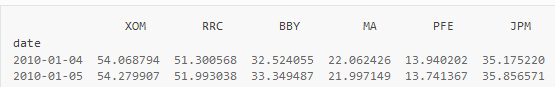
Los datos de precios no tienen que ser diarios, pero lo ideal es que la frecuencia sea la misma en todos los activos (existen soluciones alternativas, pero no son bonitas).

Después de leer sus precios históricos en un marco de datos de pandas df, debe decidir entre los métodos disponibles para estimar los rendimientos esperados y la matriz de covarianza. Los valores predeterminados sensibles son ** expected_returns.mean_historical_return ()** y la estimación de contracción de Ledoit Wolf de la matriz de covarianza encontrada en ** risk_models.CovarianceShrinkage **. Es simplemente una cuestión de aplicar las funciones relevantes al conjunto de datos de precios:

In [ ]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

mu = mean_historical_return(df)
S = CovarianceShrinkage(df).ledoit_wolf()

Entonces mu será una serie de pandas de rendimientos esperados estimados para cada activo, y S será la matriz de covarianza estimada (parte de ella se muestra a continuación):
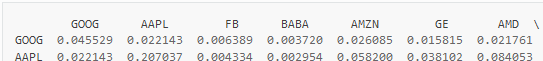

### Optimización de la frontera eficiente 

Efficient Frontier Optimisation is based on Harry Markowitz’s 1952 classic [1], which turned portfolio management from an art into a science. The key insight is that by combining assets with different expected returns and volatilities, one can decide on a mathematically optimal allocation.

If w
is the weight vector of stocks with expected returns μ, then the portfolio return is equal to each stock’s weight multiplied by its return, i.e wTμ. The portfolio risk in terms of the covariance matrix Σ is given by wTΣw. Portfolio optimisation can then be regarded as a convex optimisation problem, and a solution can be found using quadratic programming. If we denote the target return as μ∗, the precise statement of the long-only portfolio optimisation problem is as follows:
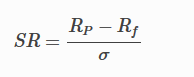
If we vary the target return, we will get a different set of weights (i.e a different portfolio) – the set of all these optimal portfolios is referred to as the efficient frontier.
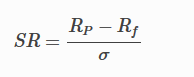
Each dot on this diagram represents a different possible portfolio, with darker blue corresponding to ‘better’ portfolios (in terms of the Sharpe Ratio). The dotted black line is the efficient frontier itself. The triangular markers represent the best portfolios for different optimisation objectives.

The Sharpe ratio is the portfolio’s return less the risk-free rate, per unit risk (volatility).
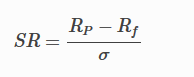
It is particularly important because it measures the portfolio returns, adjusted for risk. So in practice, rather than trying to minimise volatility for a given target return (as per Markowitz 1952), it often makes more sense to just find the portfolio that maximises the Sharpe ratio. This is implemented as the max_sharpe() method in the EfficientFrontier class. Using the series mu and dataframe S from before:





In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

If you print these weights, you will get quite an ugly result, because they will be the raw output from the optimiser. As such, it is recommended that you use the clean_weights() method, which truncates tiny weights to zero and rounds the rest.

In [ ]:
cleaned_weights = ef.clean_weights()
print(cleaned_weights)

This prints:
{'GOOG': 0.01269,
'AAPL': 0.09202,
'FB': 0.19856,
'BABA': 0.09642,
'AMZN': 0.07158,
'GE': 0.0,
'AMD': 0.0,
.............

If we want to know the expected performance of the portfolio with optimal weights w, we can use the portfolio_performance() method:

In [ ]:
ef.portfolio_performance(verbose=True)

La salida será algo así:
Expected annual return: 33.0%
Annual volatility: 21.7%
Sharpe Ratio: 1.43

A detailed discussion of optimisation parameters is presented in Efficient Frontier Optimisation. However, there are two main variations which are discussed below.
https://pyportfolioopt.readthedocs.io/en/latest/EfficientFrontier.html#efficient-frontier

### Posiciones cortas
To allow for shorting, simply initialise the EfficientFrontier object with bounds that allow negative weights, for example:

In [ ]:
ef = EfficientFrontier(mu, S, weight_bounds=(-1,1))

This can be extended to generate market neutral portfolios (with weights summing to zero), but these are only available for the efficient_risk() and efficient_return() optimisation methods for mathematical reasons. If you want a market neutral portfolio, pass ** market_neutral=True**  as shown below:

In [ ]:
ef.efficient_return(target_return=0.2, market_neutral=True)

### Tratando con muchos pesos despreciables

Por experiencia, he encontrado que la optimización eficiente de la frontera a menudo establece que muchas de las ponderaciones de los activos sean cero. Esto puede no ser ideal si necesita tener un cierto número de posiciones en su cartera, con fines de diversificación o de otro tipo.

Para combatir esto, he introducido una función experimental, que toma prestada la idea de regularización del aprendizaje automático. Esencialmente, al agregar una función de costo adicional al objetivo, puede "alentar" al optimizador a elegir diferentes ponderaciones (los detalles matemáticos se proporcionan en la sección Regularización de L2). Para usar esta característica, cambie el parámetro gamma:

In [ ]:
ef = EfficientFrontier(mu, S, gamma=1)
ef.max_sharpe()
print(ef.clean_weights())

The result of this has far fewer negligible weights than before:
{'GOOG': 0.05664,
'AAPL': 0.087,
'FB': 0.1591,
'BABA': 0.09784,
'AMZN': 0.06986,
'GE': 0.0,
..................

En la práctica, luego necesitamos convertir estos pesos en una asignación real, indicando cuántas acciones de cada activo debe comprar. Esto se discute en las ponderaciones posteriores al procesamiento.

### Mejorando el rendimiento
Digamos que ha realizado pruebas retrospectivas y los resultados no son espectaculares. ¿Qué deberías intentar?

     * Soltar los rendimientos esperados. Existe una gran cantidad de investigaciones que sugieren que las carteras de varianza mínima superan constantemente a las carteras de ratio de Sharpe máximo fuera de la muestra, debido a la dificultad de pronosticar los rendimientos esperados.
     * Pruebe diferentes modelos de riesgo: diferentes clases de activos pueden requerir diferentes modelos de riesgo.
     * Ajuste el parámetro de regularización L2 para ver cómo la diversificación afecta el rendimiento.
     * Pruebe un optimizador diferente: consulte la sección Otros optimizadores para ver algunas posibilidades.

Con esto concluye la visita guiada. Diríjase a las secciones correspondientes en la barra lateral para obtener más información sobre los parámetros y los detalles teóricos de las diferentes funciones que ofrece PyPortfolioOpt.

### Referencias
Markowitz, H. (1952). Portfolio Selection (https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1540-6261.1952.tb01525.x). 
The Journal of Finance, 7(1), 77–91. https://doi.org/10.1111/j.1540-6261.1952.tb01525.x

In [ ]:
class Person:
    name = ''
    school = ''
     
    def print_name(self):
        print (self.name)
         
    def print_school(self):
        print (self.school)
     
jorge = Person()
jorge.name = 'Jorge'
jorge.school = 'Universidad de la vida'
jorge.print_name()
jorge.print_school()